# Implementing support vector machine algorithms and cross conformal prediction on the wine dataset from sklearn and the USPS dataset

# Contents
# ---------------
### 1) SVM on the wine dataset
### 2) SVM on the USPS dataset
### 3) SVM with cross-conformal prediction on the wine dataset
### 4) SVM with cross-confromal prediction on the USPS dataset
### 5) Results
# ---------------

# 1. SVM on the wine dataset

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=1504)

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np
#Set gamma = 'auto' to stop a warning message mentioning an update to the SVC class
svc = SVC(gamma='auto')
scores = cross_val_score(svc, X_train, y_train, cv=5)
train_accuracy = sum(scores)/len(scores)
print("The training set generalization accuracy is:", train_accuracy)
svc.fit(X_train, y_train)
test_error_rate = sum(np.argmax(svc.decision_function(X_test), axis=1)!=y_test)/len(X_test)
print("The test error rate is:", test_error_rate)

The training set generalization accuracy is: 0.4364265364265364
The test error rate is: 0.6222222222222222


Due to the gamma and C paramters not being tuned and the data not being normalized we see a low accuracy for the training data and a high error rate on the test data. Both the high error rate and low generlalization accuracy indicate show that our resukts can be greatly improved upon. This will be done by normalising the data and cgoosing the best parameters.

### Next I found the best normalizer for the data and also the best parameters for that normalizer.

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
param_grid ={'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()
scalers = (min_max_scaler, standard_scaler, robust_scaler, normalizer)
scores = {}
for scaler in scalers:
    pipe = make_pipeline(scaler, SVC())
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, iid='True')
    grid.fit(X_train, y_train)
    a = str(scaler).split("(")
    a = str(a[0])
    scores[a] = (1 - grid.score(X_test,y_test), grid.best_params_)
print("MinMaxScaler test error rate and best paramters:", scores['MinMaxScaler'])
print("StandardScaler test error rate and best paramters:", scores['StandardScaler'])
print("RobustScaler test error rate and best paramters:", scores['RobustScaler'])
print("Normalizer test error rate and best paramters:", scores['Normalizer'])

MinMaxScaler test error rate and best paramters: (0.022222222222222254, {'svc__C': 1, 'svc__gamma': 1})
StandardScaler test error rate and best paramters: (0.022222222222222254, {'svc__C': 1, 'svc__gamma': 0.01})
RobustScaler test error rate and best paramters: (0.022222222222222254, {'svc__C': 1, 'svc__gamma': 0.1})
Normalizer test error rate and best paramters: (0.0444444444444444, {'svc__C': 100, 'svc__gamma': 100})


The reults show that MinMaxScaler, StandardScaler and RobustScaler all perform equally well but all use slightly different values for the parameters C and gamma..

In [4]:
svc = SVC()
param_grid ={'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(svc, param_grid=param_grid, cv=5, iid='True')
grid.fit(X_train, y_train)
scores = (1- grid.score(X_test,y_test), grid.best_params_)
print("Non-normalized data test error rate and best parameters", scores)

Non-normalized data test error rate and best parameters (0.1777777777777778, {'C': 100, 'gamma': 0.001})


Here is the test error rate if the GridSearch was used to find the best parameters but the data was not normalized. The error rate is a clear improvement on the initial error rate that was obtained before we tuned the parameters or normalized the data. On the other hand, it is also a much worse error rate then the results obtained when we normalized the data and found the best parameters. This highlights the importance of both normalization and parameter selection in creating the best model for the wine dataset.

# 2. SVM on the USPS dataset

In [5]:
import numpy as np
X1 = np.genfromtxt("digit_test.txt", delimiter=" ", usecols=np.arange(256)+1)
X2 = np.genfromtxt("digit_train.txt", delimiter=" ", usecols=np.arange(256)+1)
y1 = np.genfromtxt("digit_test.txt", delimiter=" ", usecols=0)
y2 = np.genfromtxt("digit_train.txt", delimiter=" ", usecols=0)
X = np.concatenate((X1,X2))
y = np.concatenate((y1,y2))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1504)

In [6]:
svc = SVC(gamma='auto')
scores = cross_val_score(svc, X_train, y_train, cv=5)
train_accuracy = sum(scores)/len(scores)
print("The training set generalization accuracy is:", train_accuracy)
svc.fit(X_train, y_train)
test_error_rate = (sum(svc.predict(X_test)!=y_test))/len(X_test)
print("The test error rate is:", test_error_rate)

The training set generalization accuracy is: 0.9685931597850266
The test error rate is: 0.03483870967741935


The training set generalization accuracy and test error rate imply that the model gives accurate results even before gamma and C have been tuned and the data has been normalized. It is clear to see actually from looking at the first observation from the data, shown below, that normalization of the data will not improve the results as all of the features are already in a range from [-1,1]. I will still normalize the data with all the scaler options to comfirm this hypothesis.

In [7]:
X[0]

array([-1.   , -1.   , -1.   , -1.   , -1.   , -0.948, -0.561,  0.148,
        0.384,  0.904,  0.29 , -0.782, -1.   , -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -1.   , -0.748,  0.588,  1.   ,  1.   ,
        0.991,  0.915,  1.   ,  0.931, -0.476, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -1.   , -0.787,  0.794,  1.   ,  0.727, -0.178,
       -0.693, -0.786, -0.624,  0.834,  0.756, -0.822, -1.   , -1.   ,
       -1.   , -1.   , -0.922,  0.81 ,  1.   ,  0.01 , -0.928, -1.   ,
       -1.   , -1.   , -1.   , -0.39 ,  1.   ,  0.271, -1.   , -1.   ,
       -1.   , -1.   ,  0.012,  1.   ,  0.248, -1.   , -1.   , -1.   ,
       -1.   , -1.   , -0.402,  0.326,  1.   ,  0.801, -0.998, -1.   ,
       -1.   , -0.981,  0.645,  1.   , -0.687, -1.   , -1.   , -1.   ,
       -1.   , -0.792,  0.976,  1.   ,  1.   ,  0.413, -0.976, -1.   ,
       -1.   , -0.993,  0.834,  0.897, -0.951, -1.   , -1.   , -1.   ,
       -0.831,  0.14 ,  1.   ,  1.   ,  0.302, -0.889, -1.   , -1.   ,
      

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
param_grid ={'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
normalizer = Normalizer()
scalers = (min_max_scaler, standard_scaler, robust_scaler, normalizer)
scores = {}
for scaler in scalers:
    pipe = make_pipeline(scaler, SVC())
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, iid='True', n_jobs = -1)
    grid.fit(X_train, y_train)
    a = str(scaler).split("(")
    a = str(a[0])
    scores[a] = (1 - grid.score(X_test,y_test), grid.best_params_)
print("MinMaxScaler test error rate and best paramters:", scores['MinMaxScaler'])
print("StandardScaler test error rate and best paramters:", scores['StandardScaler'])
print("RobustScaler test error rate and best paramters:", scores['RobustScaler'])
print("Normalizer test error rate and best paramters:", scores['Normalizer'])

MinMaxScaler test error rate and best paramters: (0.029247311827957034, {'svc__C': 100, 'svc__gamma': 0.01})
StandardScaler test error rate and best paramters: (0.03139784946236557, {'svc__C': 10, 'svc__gamma': 0.001})
RobustScaler test error rate and best paramters: (0.12301075268817208, {'svc__C': 100, 'svc__gamma': 0.001})
Normalizer test error rate and best paramters: (0.027956989247311825, {'svc__C': 10, 'svc__gamma': 1})


It can be seen that the Normalizer scaler gives the lowest test error rate. Now I will find the best parameters without normalizing the data to see if my hypothesis that normalizing the data is unnecessary is true.

In [9]:
svc = SVC()
param_grid ={'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(svc, param_grid=param_grid, cv=5, iid='True', n_jobs = -1)
grid.fit(X_train, y_train)
scores = (1 - grid.score(X_test,y_test), grid.best_params_)
print("Non-normalized data test error rate and best parameters", scores)

Non-normalized data test error rate and best parameters (0.026236559139784954, {'C': 10, 'gamma': 0.01})


The test error rate when the data is not normalized but the best paramters are used is lower than the one found when we normalised the data. This confirms that there is no need to normalize the USPS dataset as it doesn't improve the accuarcy and it reduces the computational efficiency.

# 3. SVM with cross-confromal prediction on the wine dataset

In [19]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=1504)
svc = SVC(C=1, gamma=1)

Below I have implemented a cross-conformal prediction using 3 folds, 5 folds and 10 folds. I have used the MinMaxScaler as it was one of the scalers that gave the best test error rate in the GridSearch. 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
folds = [3,5,10]
average_false_p_value = np.empty(0)
param_grid ={'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
for f in range(len(folds)):
    kf = KFold(shuffle=True, random_state=1504, n_splits=folds[f])
    alpha = np.empty(0)
    for rest_index, fold_index in kf.split(X_train):
        X_rest, X_fold, y_rest, y_fold = X_train[rest_index], X_train[fold_index], y_train[rest_index], y_train[fold_index]
        pipe = make_pipeline(MinMaxScaler(), SVC())
        grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, iid='True', n_jobs = -1)
        grid.fit(X_rest, y_rest)
        all_calibration_conformity_scores = grid.decision_function((X_fold))
        calibration_conformity_scores = np.empty(len(all_calibration_conformity_scores))
        for i in range(len(all_calibration_conformity_scores)):
            calibration_conformity_scores[i] = all_calibration_conformity_scores[i,y_fold[i]]
        X_test_conformity_scores = grid.decision_function(X_test)
        for i in range(len(X_test)):
            for j in range(3):
                rank = 0
                for k in range(len(X_fold)):
                    if X_test_conformity_scores[i,j] >= calibration_conformity_scores[k]:
                        rank += 1
                alpha = np.append(alpha,rank)

    alpha = alpha.reshape(folds[f],len(X_test),3) 
    p_values = (sum(alpha)+1)/((len(X_fold)*folds[f])+1)
    false_p_value = 0
    for a in range (len(p_values)):
        false_p_value += np.sum(p_values[a]) - p_values[a,y_test[a]]
    average_false_p_value = np.append(average_false_p_value, (false_p_value/(p_values.shape[0]*(p_values.shape[1]-1))))
print("The average false p value for 3 fold cross-confromal prediction is:", average_false_p_value[0])
print("The average false p value for 5 fold cross-confromal prediction is:", average_false_p_value[1])
print("The average false p value for 10 fold cross-confromal prediction is:", average_false_p_value[2])

The average false p value for 3 fold cross-confromal prediction is: 0.009690893901420224
The average false p value for 5 fold cross-confromal prediction is: 0.011959287531806629
The average false p value for 10 fold cross-confromal prediction is: 0.008651399491094159


The lowest average false p value occurs when we used 10 folds. As the wine dataset is quite small using more folds doesn't greatly reduce the computatinal efficiency but it will start to reduce the size of the calibration sets. Having a larger number of folds will reduce the size even more and risk affecting the validity of the results. 10 folds seems to be the optimal folds for the wine dataset cross-confromal prediction.

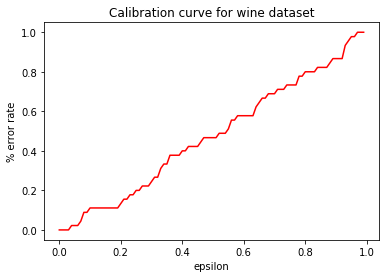

In [21]:
import matplotlib.pyplot as plt
eps = np.arange(0,1,0.01)
error_rate= np.empty(0)
for i in range(len(eps)):
    error = 0 
    for j in range(len(X_test)):
        if p_values[j,y_test[j]] <= eps[i]:
            error += 1
    error_rate = np.append(error_rate,(error/len(X_test)))
    
plt.plot(eps,error_rate, color="r")
plt.xlabel("epsilon")
plt.ylabel("% error rate")
plt.title("Calibration curve for wine dataset")
plt.show()

This is an ideal calibaration curve as it is a diagonal from (0,0) to (1,1). The slight deviations from the diaganol can be put down to the size of the dataset meaning that the law of large numbers is not in full effect.

# 4. SVM with cross-confromal prediction on the USPS datset

In [22]:
import numpy as np
X1 = np.genfromtxt("digit_test.txt", delimiter=" ", usecols=np.arange(256)+1)
X2 = np.genfromtxt("digit_train.txt", delimiter=" ", usecols=np.arange(256)+1)
y1 = np.genfromtxt("digit_test.txt", delimiter=" ", usecols=0)
y2 = np.genfromtxt("digit_train.txt", delimiter=" ", usecols=0)
X = np.concatenate((X1,X2))
y = np.concatenate((y1,y2))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1504)

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
folds = [3,5,10]
average_false_p_value = np.empty(0)
param_grid ={'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
for f in range(len(folds)):
    kf = KFold(shuffle=True, random_state=1504, n_splits=folds[f])
    alpha = np.empty(0)
    for rest_index, fold_index in kf.split(X_train):
        X_rest, X_fold, y_rest, y_fold = X_train[rest_index], X_train[fold_index], y_train[rest_index], y_train[fold_index]
        grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, iid='True', n_jobs = -1)
        grid.fit(X_rest, y_rest)
        all_calibration_conformity_scores = grid.decision_function((X_fold))
        calibration_conformity_scores = np.empty(len(all_calibration_conformity_scores))
        for i in range(len(all_calibration_conformity_scores)):
            calibration_conformity_scores[i] = all_calibration_conformity_scores[i,int(y_fold[i])]
        X_test_conformity_scores = grid.decision_function(X_test)
        for i in range(len(X_test)):
            for j in range(10):
                rank = 0
                for k in range(len(X_fold)):
                    if X_test_conformity_scores[i,j] >= calibration_conformity_scores[k]:
                        rank += 1
                alpha = np.append(alpha,int(rank))

    alpha = alpha.reshape(folds[f],len(X_test),10)
    p_values = (sum(alpha)+1)/((len(X_fold)*folds[f])+1)
    false_p_value = 0
    for a in range (len(p_values)):
        false_p_value += np.sum(p_values[a]) - p_values[a,int(y_test[a])]
    average_false_p_value = np.append(average_false_p_value, (false_p_value/(p_values.shape[0]*(p_values.shape[1]-1))))
print("The average false p value for 3 fold cross-confromal prediction is:", average_false_p_value[0])
print("The average false p value for 5 fold cross-confromal prediction is:", average_false_p_value[1])
print("The average false p value for 10 fold cross-confromal prediction is:", average_false_p_value[2])

The average false p value for 3 fold cross-confromal prediction is: 0.0038830642377040317
The average false p value for 5 fold cross-confromal prediction is: 0.004020945624362554
The average false p value for 10 fold cross-confromal prediction is: 0.003713387104486651


The data isn't normalized in the cross confromal prediction as it is clear that normalization is not needed on the USPS dataset. Here the 10 fold cross-conformal prediction gives the lowest average false p value. The 10 fold cross-conformal prediction takes quite a long time to implement and therefore slightly lacks in computaional efficiency. This however is not a huge issue and the 10 fold cross-conformal predction seems the optimal option. Chosing any more folds may result in too much of as loss in compuataional efficiency considering the improvements it will make on the test error rate will be very minor.

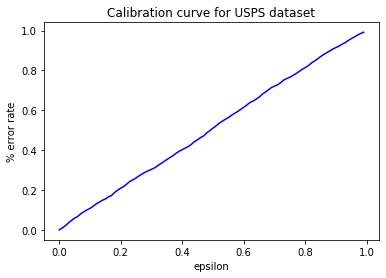

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
eps = np.arange(0,1,0.01)
error_rate= np.empty(0)
for i in range(len(eps)):
    error = 0 
    for j in range(len(X_test)):
        if p_values[j,int(y_test[j])] <= eps[i]:
            error += 1
    error_rate = np.append(error_rate,(error/len(X_test)))
    
plt.plot(eps,error_rate, color="b")
plt.xlabel("epsilon")
plt.ylabel("% error rate")
plt.title("Calibration curve for USPS dataset")
plt.show()

Here we see the calibration curve is much more true to the diagonal line. This can be down to the USPS dataset being so large. Due to this the error rate closes in on the true value of epsilon, this is due to the law of large numbers.

# 5. Results


### All results rounded to 3 significant figures

* non normalized wine dataset generalization accuracy of SVM with the default values of the parameter: 0.436
* non normalized wine dataset test error rate for the SVM with the default values of the parameters: 0.622
* wine dataset test error rate of GridSearchCV for MinMaxScaler: 0.0222
* wine dataset test error rate of GridSearchCV for StandardScaler: 0.0222
* wine dataset test error rate of GridSearchCV for no scaler: 0.178
* wine dataset average false p value for 10 fold cross-conformal prediction: 0.00865
* non normalized USPS dataset generalization accuracy of SVM with the default values of the parameter: 0.969
* non normalized USPS dataset test error rate for the SVM with the default values of the parameters: 0.0348
* USPS dataset test error rate of GridSearchCV for Normalizer: 0.0280
* USPS dataset test error rate of GridSearchCV for MinMaxScaler: 0.0293
* USPS dataset test error rate of GridSearchCV for no scaler: 0.0262
* USPS dataset average false p value for 10 fold cross-conformal prediction: 0.00371